In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('breast_cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.drop('id', axis=1, inplace=True)

In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [8]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

In [9]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<Axes: >

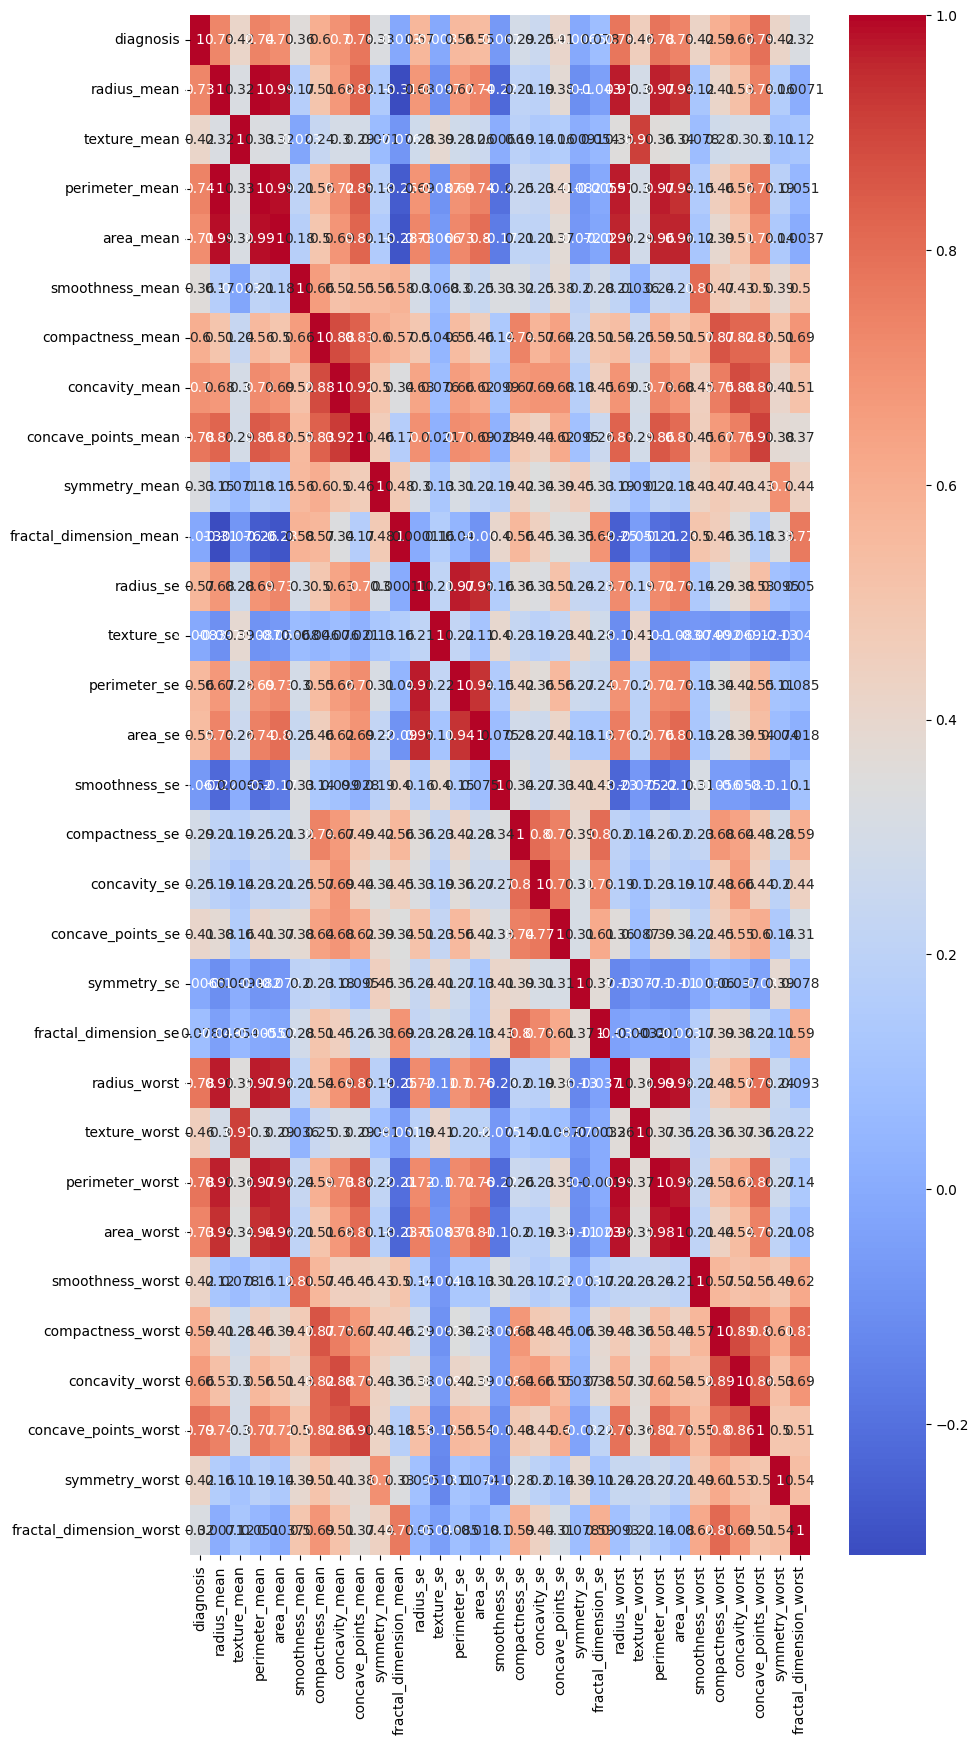

In [12]:
plt.figure(figsize=(10, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [14]:
## Add LogisticRegression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
### Predict
y_pred = model.predict(X_test)
print(y_pred)

### Probability predict
y_pred_prob = model.predict_proba(X_test)
print(y_pred_prob)

[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 1]
[[8.86409750e-01 1.13590250e-01]
 [9.00936206e-06 9.99990991e-01]
 [3.07909541e-03 9.96920905e-01]
 [9.99489866e-01 5.10134225e-04]
 [9.99939361e-01 6.06389713e-05]
 [9.48088275e-11 1.00000000e+00]
 [1.53672652e-09 9.99999998e-01]
 [3.49030633e-02 9.65096937e-01]
 [6.20657860e-01 3.79342140e-01]
 [9.99240597e-01 7.59402734e-04]
 [9.50128217e-01 4.98717826e-02]
 [1.24071210e-02 9.87592879e-01]
 [9.93926181e-01 6.07381873e-03]
 [1.43930883e-01 8.56069117e-01]
 [9.98378244e-01 1.62175599e-03]
 [7.40182295e-04 9.99259818e-01]
 [9.98147541e-01 1.85245908e-03]
 [9.99988834e-01 1.11662359e-05]
 [9.99999182e-01 8.18375684e-07]
 [1.11701472e-06 9.99998883e-01]
 [9.15836610e-01 8.41633901e-02]
 [9.90252217e-01 9.74778299e-03]
 [4.33732406e-09 9.99999996e-01]
 [9.9992

In [17]:
### Performance Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
### Apply multiple model in classification

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Support Vector Machine":SVC(),
    "K-Nearest Neighbors":KNeighborsClassifier(),
    "Naive Bayes":GaussianNB()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc
    
    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    
    
    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*50)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.9868
- F1 score: 0.9868
- Precision: 0.9880
- Recall: 0.9763
- Roc Auc Score: 0.9847
----------------------------------
Model performance for Test set
- Accuracy: 0.9737
- F1 score: 0.9736
- Precision: 0.9762
- Recall: 0.9535
- Roc Auc Score: 0.9697


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9474
- F1 score: 0.9474
- Precision: 0.9302
- Recall: 0.9302
- Roc Auc Score: 0.9440


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9649
- F1 score: 0.9647
- Precision: 0.9756
- Recall: 0.9302
- Roc Auc Score: 0.9581


Gradient Boost
Model performance for Training se

In [ ]:
## Hyperparameter Training

# Random Forest
rf_params = {
    "n_estimators": [100, 200, 500],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

# Logistic Regression
lr_params = {
    "penalty": ["l1", "l2"],
    "C": [0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}

# Support Vector Machine (SVC)
svc_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}

# K-Nearest Neighbors (KNN)
knn_params = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

In [23]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ("RandomForest", RandomForestClassifier(), rf_params),
    ("LogisticRegression", LogisticRegression(), lr_params),
    ("SVM", SVC(), svc_params),
    ("KNN", KNeighborsClassifier(), knn_params),
]

In [24]:
randomcv_models

[('RandomForest',
  RandomForestClassifier(),
  {'n_estimators': [100, 200, 500],
   'max_depth': [5, 10, None],
   'min_samples_split': [2, 5, 10],
   'criterion': ['gini', 'entropy']}),
 ('LogisticRegression',
  LogisticRegression(),
  {'penalty': ['l1', 'l2'],
   'C': [0.1, 1, 10],
   'solver': ['liblinear', 'lbfgs']}),
 ('SVM',
  SVC(),
  {'C': [0.1, 1, 10],
   'kernel': ['linear', 'rbf', 'poly'],
   'gamma': ['scale', 'auto']}),
 ('KNN',
  KNeighborsClassifier(),
  {'n_neighbors': [3, 5, 7, 9],
   'weights': ['uniform', 'distance'],
   'metric': ['euclidean', 'manhattan']})]

In [25]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
---------------- Best Params for RandomForest -------------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None, 'criterion': 'entropy'}
---------------- Best Params for LogisticRegression -------------------
{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
---------------- Best Params for SVM -------------------
{'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
---------------- Best Params for KNN -------------------
{'weights': 'uniform', 'n_neighbors': 3, 'metric': 'manhattan'}


In [26]:
# Dictionary of models with best parameters from RandomizedSearchCV
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, min_samples_split=2,
                                            max_depth=10, criterion='entropy'),

    "Logistic Regression": LogisticRegression(solver='liblinear', penalty='l1',
                                              C=0.1, max_iter=1000),

    "SVM": SVC(kernel='rbf', gamma='scale', C=1, probability=True),  # probability=True for ROC AUC

    "KNN": KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='manhattan')
}

# Iterate through models and evaluate performance
for model_name, model in models.items():
    print(f"\n🔍 Training {model_name}...\n")

    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Get Probabilities for ROC-AUC (only for models supporting predict_proba)
    y_train_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_rocauc_score = roc_auc_score(y_train, y_train_proba) if y_train_proba is not None else None
    
    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_rocauc_score = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else None
    
     # Display Results
    print(f"🔹 {model_name} Performance:")
    print("\n📌 Training Set:")
    print(f"- Accuracy: {model_train_accuracy:.4f}")
    print(f"- F1 Score: {model_train_f1:.4f}")
    print(f"- Precision: {model_train_precision:.4f}")
    print(f"- Recall: {model_train_recall:.4f}")
    print(f"- ROC AUC Score: {model_train_rocauc_score:.4f}" if model_train_rocauc_score is not None else "- ROC AUC Score: Not Available")


    print("\n📌 Test Set:")
    print(f"- Accuracy: {model_test_accuracy:.4f}")
    print(f"- F1 Score: {model_test_f1:.4f}")
    print(f"- Precision: {model_test_precision:.4f}")
    print(f"- Recall: {model_test_recall:.4f}")
    print(f"- ROC AUC Score: {model_test_rocauc_score:.4f}" if model_test_rocauc_score is not None else "- ROC AUC Score: Not Available")

    print("=" * 50, "\n")


🔍 Training Random Forest...

🔹 Random Forest Performance:

📌 Training Set:
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000

📌 Test Set:
- Accuracy: 0.9649
- F1 Score: 0.9647
- Precision: 0.9652
- Recall: 0.9649
- ROC AUC Score: 0.9967


🔍 Training Logistic Regression...

🔹 Logistic Regression Performance:

📌 Training Set:
- Accuracy: 0.9802
- F1 Score: 0.9802
- Precision: 0.9802
- Recall: 0.9802
- ROC AUC Score: 0.9938

📌 Test Set:
- Accuracy: 0.9649
- F1 Score: 0.9649
- Precision: 0.9649
- Recall: 0.9649
- ROC AUC Score: 0.9977


🔍 Training SVM...

🔹 SVM Performance:

📌 Training Set:
- Accuracy: 0.9890
- F1 Score: 0.9890
- Precision: 0.9892
- Recall: 0.9890
- ROC AUC Score: 0.9979

📌 Test Set:
- Accuracy: 0.9825
- F1 Score: 0.9824
- Precision: 0.9829
- Recall: 0.9825
- ROC AUC Score: 0.9974


🔍 Training KNN...

🔹 KNN Performance:

📌 Training Set:
- Accuracy: 0.9912
- F1 Score: 0.9912
- Precision: 0.9913
- Recall: 0.9912
- ROC AUC Sco

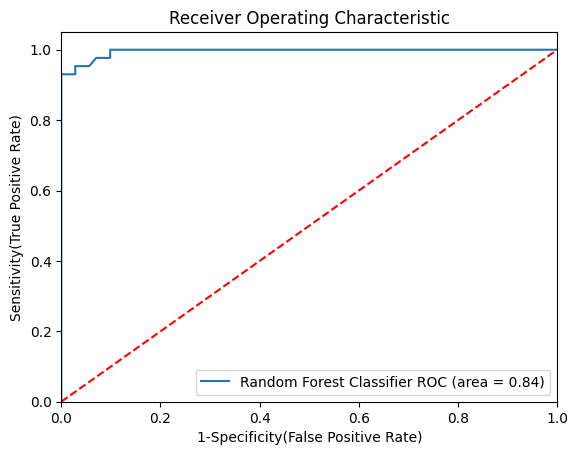

In [27]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=200,min_samples_split=2,
                                          max_features=8,max_depth=None, criterion='entropy'),
    'auc':  0.8365
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc_rf.png")
plt.show()


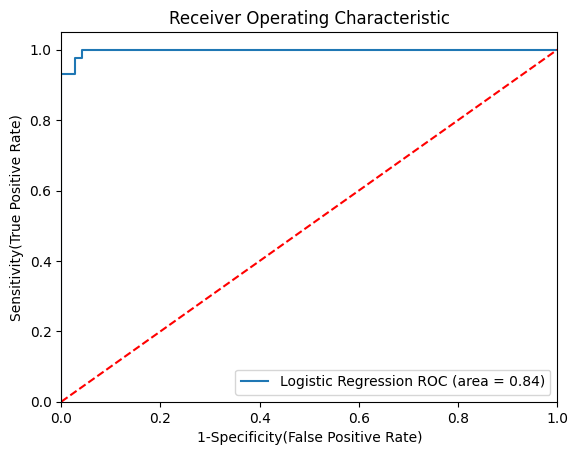

In [28]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label':  "Logistic Regression",
    'model':  LogisticRegression(solver='liblinear', penalty='l1',
                                              max_iter=1000, C=0.1),
    'auc':  0.8365
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc_lr.png")
plt.show()


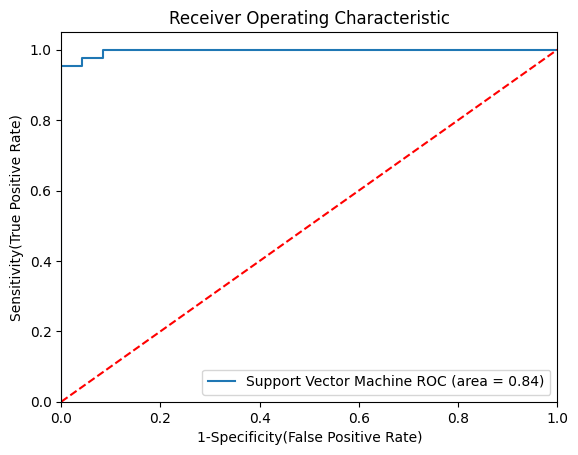

In [29]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Support Vector Machine',
    'model':  SVC(kernel='rbf', gamma='scale', degree=4, class_weight='balanced', C=1, probability=True),
    'auc':  0.8365
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc_svm.png")
plt.show()


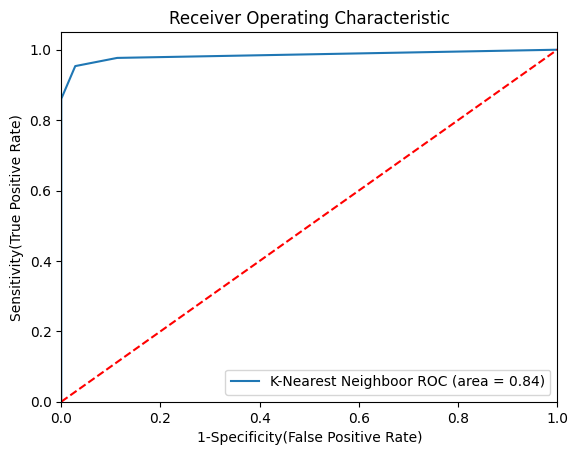

In [30]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'K-Nearest Neighboor',
    'model':  KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='manhattan'),

    'auc':  0.8365
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc_knn.png")
plt.show()


In [31]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

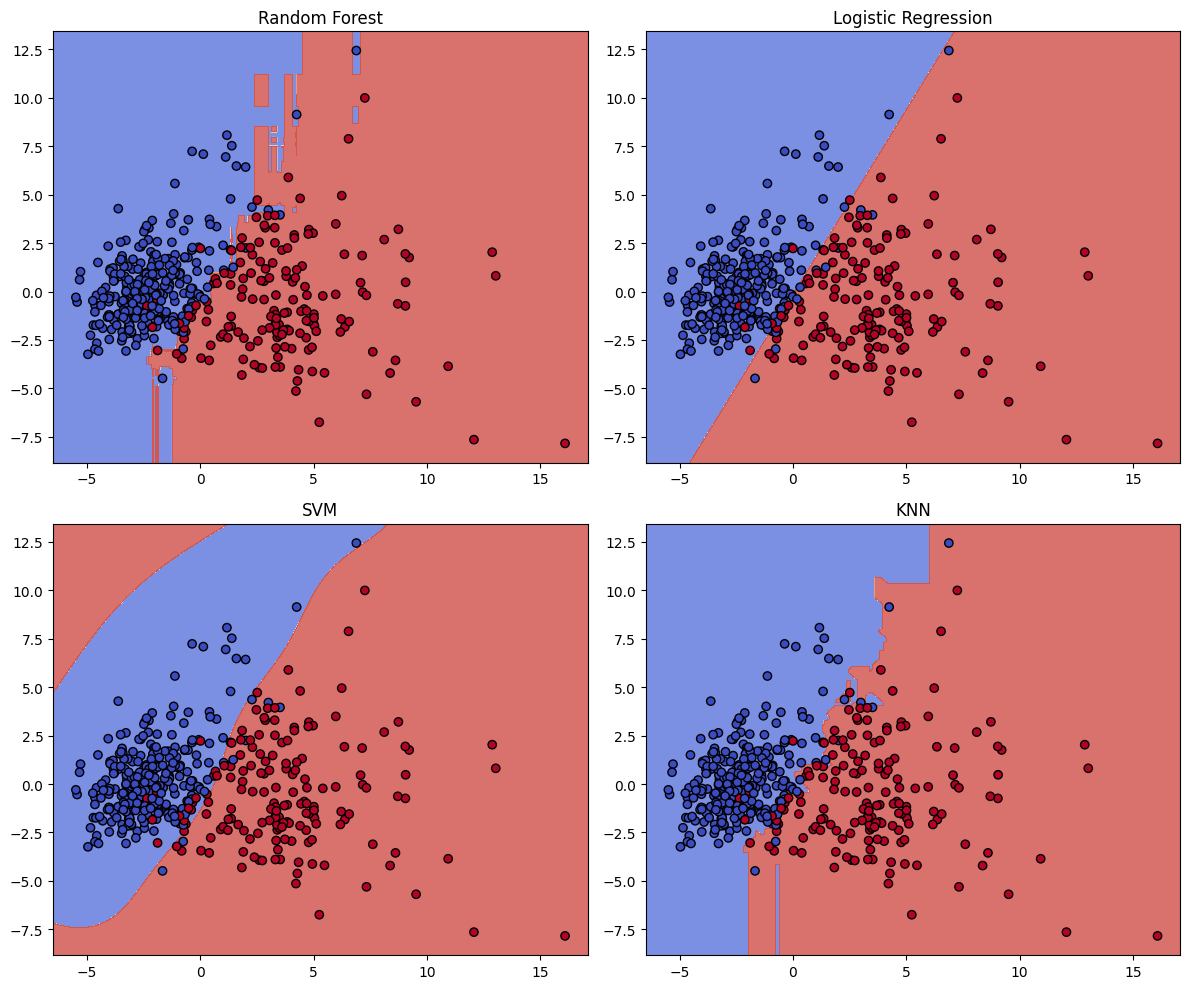

In [ ]:
X1, X2 = np.meshgrid(np.arange(start=X_train_2d[:, 0].min() - 1, stop=X_train_2d[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_train_2d[:, 1].min() - 1, stop=X_train_2d[:, 1].max() + 1, step=0.01))

# Plot Decision Boundaries for Each Model
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid for subplots
axes = axes.flatten()  # Flatten the axes array for easier iteration

for idx, (model_name, model) in enumerate(models.items()):
    model.fit(X_train_2d, y_train)

    # Predict on Meshgrid
    predictions = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

    # Plot decision boundary
    axes[idx].contourf(X1, X2, predictions, alpha=0.75, cmap=plt.cm.coolwarm)

    # Plot training points
    scatter = axes[idx].scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')

    axes[idx].set_title(model_name)  # Title for each subplot

plt.tight_layout()
plt.show()

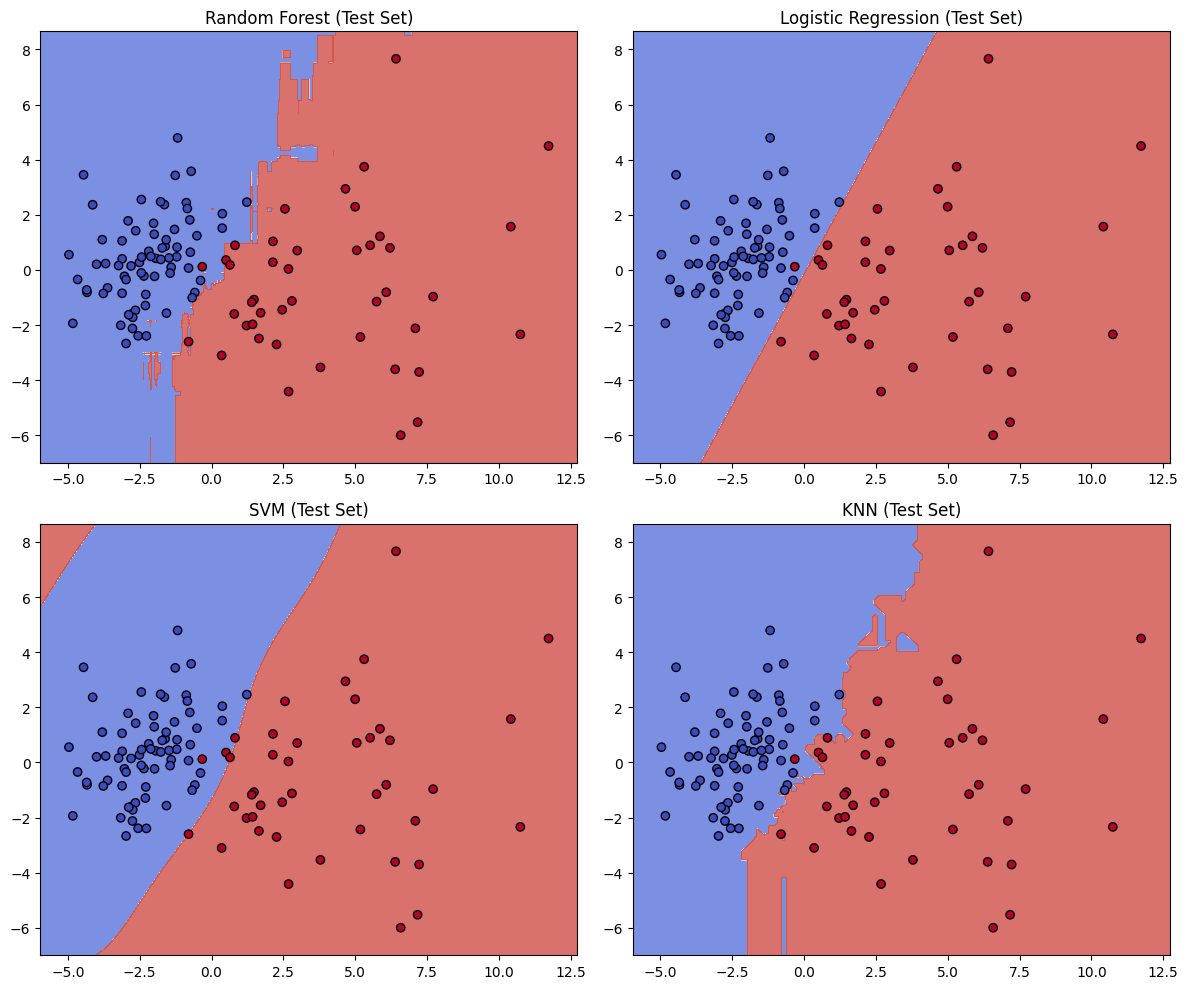

In [ ]:
X1, X2 = np.meshgrid(np.arange(start=X_test_2d[:, 0].min() - 1, stop=X_test_2d[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_test_2d[:, 1].min() - 1, stop=X_test_2d[:, 1].max() + 1, step=0.01))

# Plot Decision Boundaries for Each Model on Test Set
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid for subplots
axes = axes.flatten()  # Flatten the axes array for easier iteration

for idx, (model_name, model) in enumerate(models.items()):
    model.fit(X_train_2d, y_train)

    # Predict on Meshgrid using Test Set
    predictions = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

    # Plot decision boundary
    axes[idx].contourf(X1, X2, predictions, alpha=0.75, cmap=plt.cm.coolwarm)

    # Plot test points instead of training points
    scatter = axes[idx].scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')

    axes[idx].set_title(f"{model_name} (Test Set)")  # Update title

plt.tight_layout()
plt.show()
